MATH2070 Optimisation and Financial Mathematics

In [8]:
#importing packages & libraries
import pandas as pd
import numpy as np
from numpy.linalg import inv

from pypfopt.efficient_frontier import EfficientFrontier
import pypfopt.plotting as Plotting
import matplotlib.pyplot as plt

#Import data
data = pd.read_table("project_data.csv", sep=",", header='infer')
print(data.head()) #check

        Date    BHP     CSL    NAB    TCL   TLS
0  1/07/2022  35.47  264.19  26.01  13.90  3.67
1  4/07/2022  35.34  269.66  26.23  13.81  3.72
2  5/07/2022  35.42  273.72  26.14  13.66  3.72
3  6/07/2022  33.44  280.77  26.61  13.65  3.77
4  7/07/2022  34.49  281.63  26.61  13.58  3.72


1. For each of the 5 stocks, compute their simple returns, where St is the stock price on day t. Calculate the mean and covariance matrix for the returns to 5 decimal places, and confirm.

In [120]:
#Show percentage of change from previous data and deleting first row
daily_returns = data[['BHP','CSL','NAB','TCL','TLS']].pct_change()
daily_returns = daily_returns.drop(index=0)

#Calculating mean and 
ret = daily_returns.mean().round(5).to_numpy()
cov = daily_returns.cov().round(5).to_numpy()

print("number 1)")
print("-------------------------------------------")
print("mean: ", ret,)
print("covariance:\n", cov)

number 1)
-------------------------------------------
mean:  [0.00099 0.00023 0.00013 0.00015 0.00058]
covariance:
 [[ 3.0e-04 -1.0e-05  3.0e-05  2.0e-05 -1.0e-05]
 [-1.0e-05  1.2e-04  3.0e-05  4.0e-05  3.0e-05]
 [ 3.0e-05  3.0e-05  1.5e-04  4.0e-05  2.0e-05]
 [ 2.0e-05  4.0e-05  4.0e-05  1.0e-04  3.0e-05]
 [-1.0e-05  3.0e-05  2.0e-05  3.0e-05  7.0e-05]]


2. Find the optimal portfolio x(t) for investors with risk-aversion parameter t (i.e. you answer should be a function of t). For what value(s) og t>=0 does the optimal portfolio have no short selling of any asset?

In [121]:
def portfolio_riskavert(ret,cov,t,short):
    if short == True:
        ef_fron = EfficientFrontier(ret, cov, weight_bounds=(-1,1))
    else:
        ef_fron = EfficientFrontier(ret, cov, weight_bounds=(0,1))
        
    fin = ef_fron.max_quadratic_utility(risk_aversion=t, market_neutral=False)
    fin = pd.DataFrame([fin]).round(5)
    
    return(fin.to_numpy())

def portfolio_stats(weights):
    p_return=np.sum(ret*weights)
    p_risk=np.sqrt(np.dot(weights, np.dot(cov, np.transpose(weights))))
    
    return({'return':p_return, 'risk':p_risk})
print("number 5b)")
print("-------------------------------------------")
print(portfolio_riskavert(ret,cov,27.18264,True))
print("The portfolio has no short selling when t =", 27.18264/2 )

number 5b)
-------------------------------------------
[[ 0.2217   0.12495  0.04025 -0.       0.6131 ]]
The portfolio has no short selling when t = 13.59132


Optimal Portfolio Weights: [ 0.76974891 -0.06057486  0.29082596]
Portfolio Stats: {'return': 0.1088452623304855, 'risk': 0.08784818147855407}
The portfolio has no short selling when t = 13.59132


3. Consider a specific investor with risk aversion parameter t = 0.04 who wants to invest $10,000 in these assets.
(a) What is their optimal investment allocation, mean return and risk (standard deviation) of their investment? Give all answers in $.
(b) Suppose now the investor does not want to short sell any asset. What is their new optimal portfolio, mean return and risk (standard deviation)? Again, give all answers in $.

In [53]:
#number 3a)
#there is short selling
t = 0.04*2   
w1 = portfolio_riskavert(ret,cov,t,True)
m1 = portfolio_stats(w1)['return']
r1 = portfolio_stats(w1)['risk']

print("3a)With Shortselling")
print("-------------------------------------------")
print("Optimal portfolio allocates:",10000*w1)
print("Optimal portfolio for BHP = $10.000, CSL = $10.000, NAB = $-10.000, TCL = $-10.000, TLS = $10.000")
print("Mean return:",10000*m1)
print("The mean return of the portfolio is $15.20")
print("Risk:",10000*r1)
print("The risk of the portfolio is $223.61")

#number 3b)
#there is no short selling
t = 0.04*2   
w2 = portfolio_riskavert(ret,cov,t,False)
m2 = portfolio_stats(w2)['return']
r2 = portfolio_stats(w2)['risk']

print(" ")
print("3b)Without Shortselling")
print("-------------------------------------------")
print("Optimal portfolio allocates:",10000*w2)
print("Optimal portfolio with no short selling is BHP = $10.000")
print("Mean return:",10000*m2)
print("The mean return of the portfolio is $9.9")
print("Risk:",10000*r2)
print("The risk of the portfolio is $173.21")

With Shortselling
-------------------------------------------
Optimal portfolio allocates: [[ 10000.  10000. -10000. -10000.  10000.]]
Optimal portfolio for BHP = $10.000, CSL = $10.000, NAB = $-10.000, TCL = $-10.000, TLS = $10.000
Mean return: 15.200000000000001
The mean return of the portfolio is $15.20
Risk: [[223.60679775]]
The risk of the portfolio is $223.61
 
Without Shortselling
-------------------------------------------
Optimal portfolio allocates: [[ 1.e+04 -1.e-01 -0.e+00 -0.e+00  1.e-01]]
Optimal portfolio with no short selling is BHP = $10.000
Mean return: 9.900035
The mean return of the portfolio is $9.9
Risk: [[173.20508076]]
The risk of the portfolio is $173.21


4.  Illustrate this problem graphically: in the (σ, μ) plane, show (on the same graph):
(i) The 5 assets: BHP, CSL, NAB, TCL, TLS
(ii) The optimal (unconstrained) portfolio for the investor from Question 3(a)
(iii) The minimum risk portfolio
(iv) The efficient frontier and minimum variance frontier
(v) 5000 randomly generated feasible portfolios

You should format the plot with appropriate labels, etc. I recommend using the axis ranges σ ∈ [0.005, 0.02] and μ ∈ [−0.001, 0.002], but you may choose other values if you prefer.

number 4)
-------------------------------------------


/Users/anabelgeraldine/opt/anaconda3/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/Users/anabelgeraldine/opt/anaconda3/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/Users/anabelgeraldine/opt/anaconda3/lib/python3.9

/Users/anabelgeraldine/opt/anaconda3/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/Users/anabelgeraldine/opt/anaconda3/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/Users/anabelgeraldine/opt/anaconda3/lib/python3.9

/Users/anabelgeraldine/opt/anaconda3/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/Users/anabelgeraldine/opt/anaconda3/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/Users/anabelgeraldine/opt/anaconda3/lib/python3.9

/Users/anabelgeraldine/opt/anaconda3/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/Users/anabelgeraldine/opt/anaconda3/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/Users/anabelgeraldine/opt/anaconda3/lib/python3.9

/Users/anabelgeraldine/opt/anaconda3/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/Users/anabelgeraldine/opt/anaconda3/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/Users/anabelgeraldine/opt/anaconda3/lib/python3.9

/Users/anabelgeraldine/opt/anaconda3/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/Users/anabelgeraldine/opt/anaconda3/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/Users/anabelgeraldine/opt/anaconda3/lib/python3.9

/Users/anabelgeraldine/opt/anaconda3/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/Users/anabelgeraldine/opt/anaconda3/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/Users/anabelgeraldine/opt/anaconda3/lib/python3.9

/Users/anabelgeraldine/opt/anaconda3/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/Users/anabelgeraldine/opt/anaconda3/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/Users/anabelgeraldine/opt/anaconda3/lib/python3.9

/Users/anabelgeraldine/opt/anaconda3/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/Users/anabelgeraldine/opt/anaconda3/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/Users/anabelgeraldine/opt/anaconda3/lib/python3.9

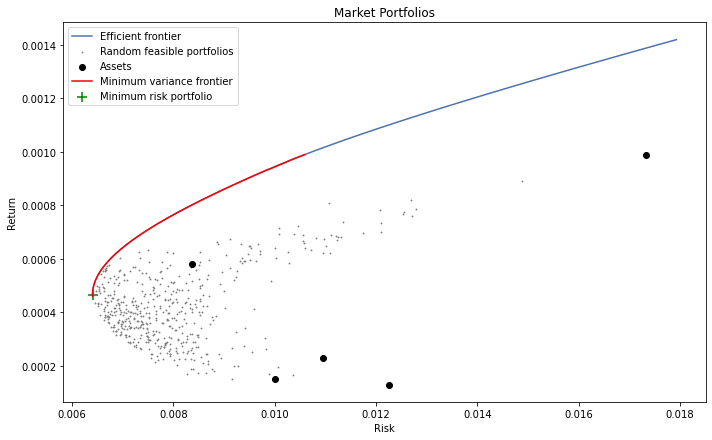

In [119]:
print("number 4)")
print("-------------------------------------------")
ef_fron = EfficientFrontier(ret, cov, weight_bounds=(-1, 1))
w0 = ef_fron.min_volatility()
w0 = pd.DataFrame([w0]).round(5).to_numpy()
r0 = np.empty([1,2])
r0[0,0] = portfolio_stats(w0)['return']
r0[0,1] = portfolio_stats(w0)['risk']

t_ret = np.linspace(ret.min(), ret.max(), 100)
weights_min_var = np.empty([len(t_ret), 5])
r_min_var = np.empty([len(t_ret), 2])
for t in range(0, len(t_ret)):
    ef_fron = EfficientFrontier(ret, cov, weight_bounds=(-1, 1))
    temp = ef_fron.efficient_return(t_ret[t])
    weights_min_var[t,] = pd.DataFrame([temp]).round(5).to_numpy()
    r_min_var[t,0] = portfolio_stats(weights_min_var[t,])['return']
    r_min_var[t,1] = portfolio_stats(weights_min_var[t,])['risk']

t_risk = np.linspace(0.007, 0.011, 100)
weights_max_ret = np.empty([len(t_risk), 5])
r_max_ret = np.empty([len(t_risk), 2])
for t in range(0, len(t_risk)):
    ef_fron = EfficientFrontier(ret, cov, weight_bounds=(-1, 1))
    temp = ef_fron.efficient_risk(t_risk[t])
    weights_max_ret[t,] = pd.DataFrame([temp]).round(5).to_numpy()
    r_max_ret[t,0] = portfolio_stats(weights_max_ret[t,])['return']
    r_max_ret[t,1] = portfolio_stats(weights_max_ret[t,])['risk']

n_samples = 500
ef_fron = EfficientFrontier(ret, cov, weight_bounds=(-1, 1))
w = np.random.dirichlet(np.ones(ef_fron.n_assets), n_samples)
rets = w.dot(ef_fron.expected_returns)
stds = np.sqrt(np.diag(w @ ef_fron.cov_matrix @ w.T))

x1 = r_max_ret[:,1]; y1 = r_max_ret[:,0]; 
x2 = r_min_var[:,1]; y2 = r_min_var[:,0]
x0 = r0[0,1]; y0 = r0[0,0]

fig, ax = plt.subplots(figsize=(10, 6)) 
Plotting.plot_efficient_frontier(ef_fron, ax=ax, show_assets=False)
plt.scatter(stds, rets, label="Random feasible portfolios", marker="*", s=1, c="grey")
plt.scatter(sigmas, ret, label="Assets", c="black")
plt.plot(x2, y2, label="Minimum variance frontier", c="r")
plt.scatter(x0, y0, label="Minimum risk portfolio", marker="+", c="green", s=100)
plt.legend()
plt.title("Market Portfolios")
plt.xlabel("Risk")
plt.ylabel("Return")
plt.show()

5. Suppose now that the market also has a risk-free cash asset with return 0.0001 
a) what is the new optimal portfolio for the investor from Question 3 (with short selling allowed)
5b) In the plot, show in the (σ, μ) plane: (i) The 5 assets (ii)The optimal unconstranined portfolios for the investor with only risky assets (Question 3a) with a risk-free asset (Question 5a) (iii)The efficient frontier and minimum variance frontier (iv) The capital marke line (v) The market portfolio

In [117]:
#number 5a)
rf = 0.0001 

re2 = np.append(r,[rf]) 
co2 = np.empty([6,6]) 
co2[0:5,0:5] = C; co2[5,5]=0.0000000002 
co2[0:5,5]=0; co2[5,0:5]=0; 

t = 0.08 
w3 = portfolio_riskavert(re2, co2,t, True) 
mr3 = np.sum(re2*w3) 
r3 = np.sqrt(np.dot (w3, np.dot (co2, np.transpose (w3)))) 
print("number 5b)")
print("-------------------------------------------")
print(10000*w3)
print("The optimal portfolio would be $10.000 in BHP, $10.000 in CSL, $-10.000 in NAB, $10.000 in TLS")
print("It means that it borrows $10.000 at the free-risk rate.")

number 5b)
-------------------------------------------
[[ 10000.  10000. -10000.      0.  10000. -10000.]]
The optimal portfolio would be $10.000 in BHP, $10.000 in CSL, $-10.000 in NAB, $10.000 in TLS
It means that it borrows $10.000 at the free-risk rate.


number 5b)
-------------------------------------------


/Users/anabelgeraldine/opt/anaconda3/lib/python3.9/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


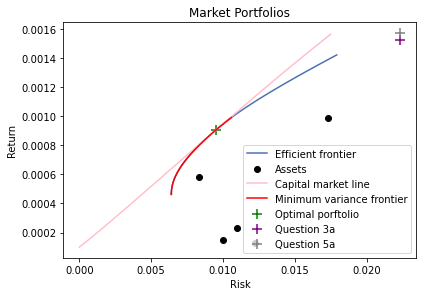

In [118]:
#number 5b)
rf_vec = np.repeat (rf, 5, axis= None) 
temp = np.dot(inv(C), np.transpose(r-rf_vec)) 
gamma = np.sum(temp) 

weights_opt = temp/gamma 
opt_ret = portfolio_stats(weights_opt)['return'] 
opt_risk = portfolio_stats (weights_opt)['risk'] 

a = np.linspace(0,0.0175,100) 
ret_wrfa = rf + ((y1-rf)/x1)*a 

print("number 5b)")
print("-------------------------------------------")
ef = EfficientFrontier (r, C, weight_bounds=(-1, 1)) 
fig, ax = plt.subplots() 
Plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)
plt.scatter(sigmas, r,label="Assets",c="black") 
plt.plot(a,ret_wrfa,c="pink", label="Capital market line") 
plt.plot(x2, y2,label="Minimum variance frontier",c="r") 
plt.scatter(opt_risk, opt_ret,label="Optimal porftolio", marker="+",c="green",s=100) 
plt.scatter(r1, m1, label="Question 3a", marker="+",c="purple", s=100) 
plt.scatter(r3, mr3,label="Question 5a",marker="+",c="grey",s=100) 
plt.legend() 
plt.title("Market Portfolios") 
plt.xlabel("Risk") 
plt.ylabel("Return") 
plt.show() 


6. Take the market portfolio from Question 5b(v) as the market portfolio for this question.
(a) Compute the betas of the 5 stocks in the market.
(b) With reference to the underlying businesses, explain why the betas of BHP and TCL are
so different. Your answer should be brief, at most 1 paragraph.


In [116]:
# number 6a)
print(weights_opt)
data = data.assign(MVL=data.BHP*0.39696499+data.CSL*0.03639058+data.NAB*-0.11819688+data.TCL*-0.27997322+data. TLS*0.96481454) 
dr2 = data[['BHP','CSL','NAB','TCL','TLS','MVL']].pct_change()
dr2 = dr2.drop([0])
cov2 = dr2.cov().round(5).to_numpy()
print(cov2)

#computing betas
print(" ")
print("number 6a) betas")
print("-------------------------------------------")
print(cov2[5,0:5]/cov2[5,5])
print("As can be seen, the betas for:")
print("BHP = 1.26666667")
print("CSL = 0.26666667")
print("NAB = 0.06666667")
print("TCL = 0.06666667")
print("TLS = 0.13333333")

print(" ")
print("number 6b) ")
print("-------------------------------------------")
print("The difference in betas between BHP and TCL can be due to ")
print("the nature of their underlying businesses. BHP, being a mining company,")
print("is heavily influeced by global commodity prices, particularly those ")
print("of coal, copper, iron, and oil. These commodities tend to exhibit ")
print("higher volatility, leading to a higher beta. On the other hand, TCL ")
print("operates in the toll road management industry, which is relatively more")
print("stable and less susceptible to immediate market flunctuations. ")
print("Consequently, TCL's business operations result in a lower beta compared ")
print("to BHP. In conclusion, BHP's exposure to volatile commodity markets ")
print("contributes to its higher beta, while TCL's operations in a relatively") 
print("stable industry which lead to a lower beta. ")




[ 0.39696499  0.03639058 -0.11819688 -0.27997322  0.96481454]
[[ 3.0e-04 -1.0e-05  3.0e-05  2.0e-05 -1.0e-05  1.9e-04]
 [-1.0e-05  1.2e-04  3.0e-05  4.0e-05  3.0e-05  4.0e-05]
 [ 3.0e-05  3.0e-05  1.5e-04  4.0e-05  2.0e-05  1.0e-05]
 [ 2.0e-05  4.0e-05  4.0e-05  1.0e-04  3.0e-05  1.0e-05]
 [-1.0e-05  3.0e-05  2.0e-05  3.0e-05  7.0e-05  2.0e-05]
 [ 1.9e-04  4.0e-05  1.0e-05  1.0e-05  2.0e-05  1.5e-04]]
 
number 6a) betas
[1.26666667 0.26666667 0.06666667 0.06666667 0.13333333]
As can be seen, the betas for:
BHP = 1.26666667
CSL = 0.26666667
NAB = 0.06666667
TCL = 0.06666667
TLS = 0.13333333
 
number 6b) 
The difference in betas between BHP and TCL can be attributed to 
the nature of their underlying businesses. BHP, being a mining company,
is heavily influened by global commodity prices, particularly those 
of coal, copper, iron ore, and oil. These commodities tend to exhibit 
higher volatility, leading to a higher beta. On the other hand, TCL 
operates in the toll road management indus